# Global Terrorism Visualization

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [279]:
data=pd.read_csv("terrorism.csv")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [280]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name','attacktype1_txt':'attack','targtype1_txt':'target','gname':'group','weaptype1_txt':'weapon'},inplace=True)

In [281]:
data=data[['year','month','day','country','country_name','region_txt','provstate','city','latitude','longitude','location','summary','success','suicide','attack','group','target','claimmode_txt','propextent_txt','weapon','nkill','ransom','ransompaid','nwound']]
data.isnull().sum()

year                   0
month                  0
day                    0
country                0
country_name           0
region_txt             0
provstate          14502
city                 446
latitude            4606
longitude           4606
location          122376
summary            66138
success                0
suicide                0
attack                 0
group                  0
target                 0
claimmode_txt     154102
propextent_txt    109805
weapon                 0
nkill               9682
ransom             94037
ransompaid        169643
nwound             15325
dtype: int64

In [282]:
data['victims']=data['nkill']+data['nwound']
data.head()

,year,month,day,country,country_name,region_txt,provstate,city,latitude,longitude,...,group,target,claimmode_txt,propextent_txt,weapon,nkill,ransom,ransompaid,nwound,victims
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,MANO-D,Private Citizens & Property,NaN,NaN,Unknown,1.0,0.0,NaN,0.0,1.0
1,1970,0,0,130,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,...,23rd of September Communist League,Government (Diplomatic),NaN,NaN,Unknown,0.0,1.0,NaN,0.0,0.0
2,1970,1,0,160,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Unknown,Journalists & Media,NaN,NaN,Unknown,1.0,0.0,NaN,0.0,1.0
3,1970,1,0,78,Greece,Western Europe,Attica,Athens,37.983773,23.728157,...,Unknown,Government (Diplomatic),NaN,NaN,Explosives/Bombs/Dynamite,NaN,0.0,NaN,NaN,NaN
4,1970,1,0,101,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,...,Unknown,Government (Diplomatic),NaN,NaN,Incendiary,NaN,0.0,NaN,NaN,NaN


**Basic EDA**

In [283]:
data.groupby('country_name')['nkill'].sum().sort_values(ascending=False)[:20]

country_name
Iraq           71082.0
Afghanistan    33146.0
Pakistan       22734.0
Nigeria        20665.0
India          18842.0
Sri Lanka      15528.0
Colombia       14600.0
Syria          13132.0
Peru           12763.0
El Salvador    12053.0
Algeria        11091.0
Nicaragua      10598.0
Philippines     9058.0
Somalia         8254.0
Yemen           8011.0
Turkey          6664.0
Guatemala       5167.0
Russia          4246.0
Burundi         4182.0
Lebanon         4038.0
Name: nkill, dtype: float64

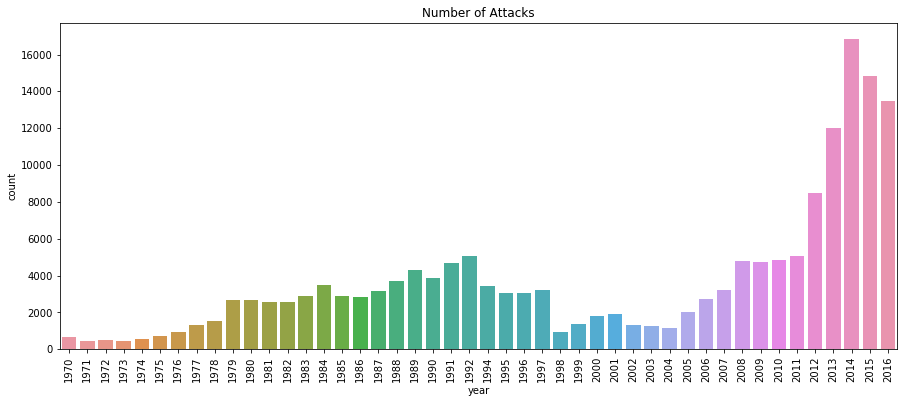

In [284]:
plt.subplots(figsize=(15,6))
sns.countplot(x='year',data=data)
plt.xticks(rotation=90)
plt.title("Number of Attacks")
plt.show()

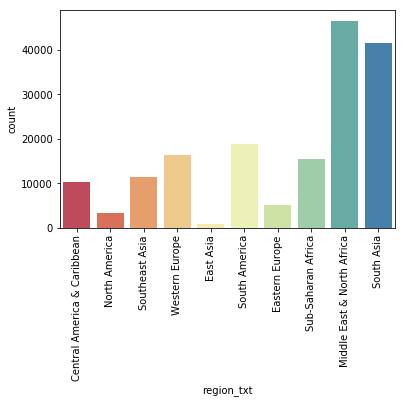

In [322]:
#most common region
sns.countplot(x='region_txt', data=data[data['region_txt'].isin(data['region_txt'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

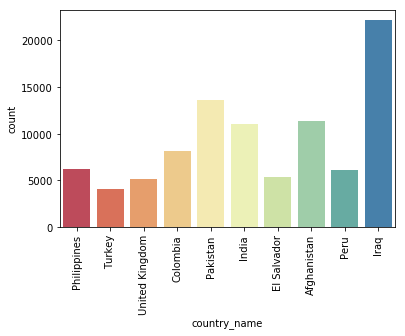

In [332]:
#most common country--countries with the most attacks
sns.countplot(x='country_name', data=data[data['country_name'].isin(data['country_name'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

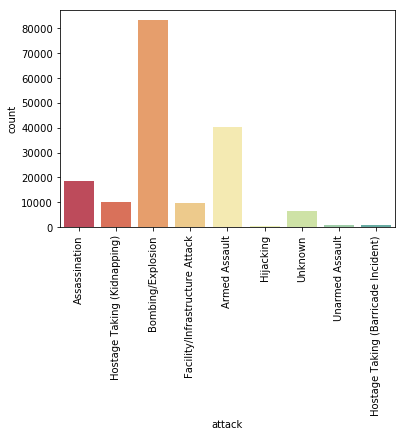

In [323]:
#most common attack
sns.countplot(x='attack', data=data[data['attack'].isin(data['attack'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

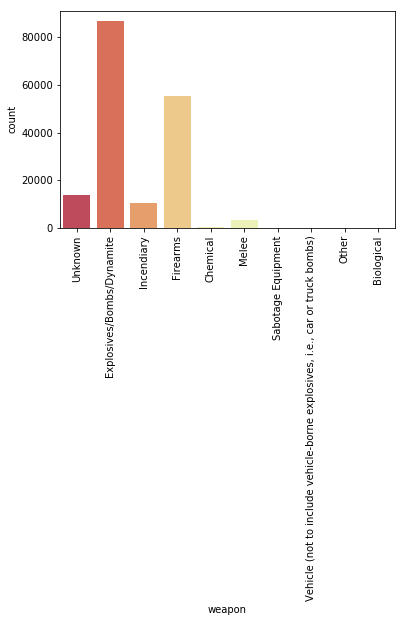

In [324]:
#most common weapon
sns.countplot(x='weapon', data=data[data['weapon'].isin(data['weapon'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

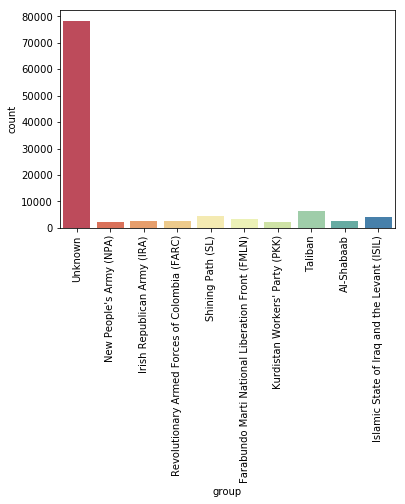

In [325]:
#most common group
sns.countplot(x='group', data=data[data['group'].isin(data['group'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

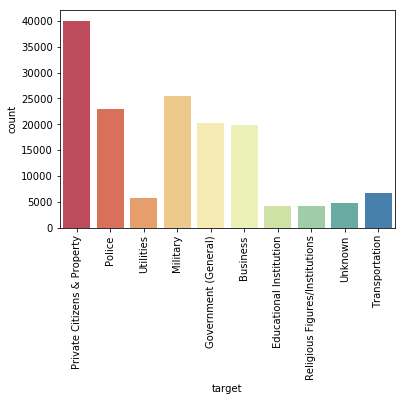

In [326]:
#most common target
sns.countplot(x='target', data=data[data['target'].isin(data['target'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 10))
plt.xticks(rotation=90)
plt.show()

Q: How have number of attacks per region changed over time?

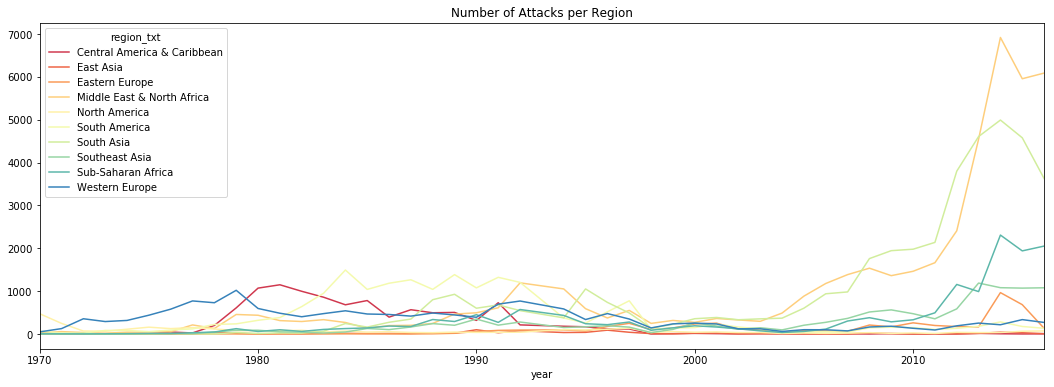

In [306]:
terror_region=pd.crosstab(data[data['region_txt'].isin(data['region_txt'].value_counts()[:10].index)].year,data[data['region_txt'].isin(data['region_txt'].value_counts()[:10].index)].region_txt)
terror_region

terror_region.plot(color=sns.color_palette("Spectral", 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Number of Attacks per Region")
plt.show()

What are the most common weapons of attack? Does this depend on region?

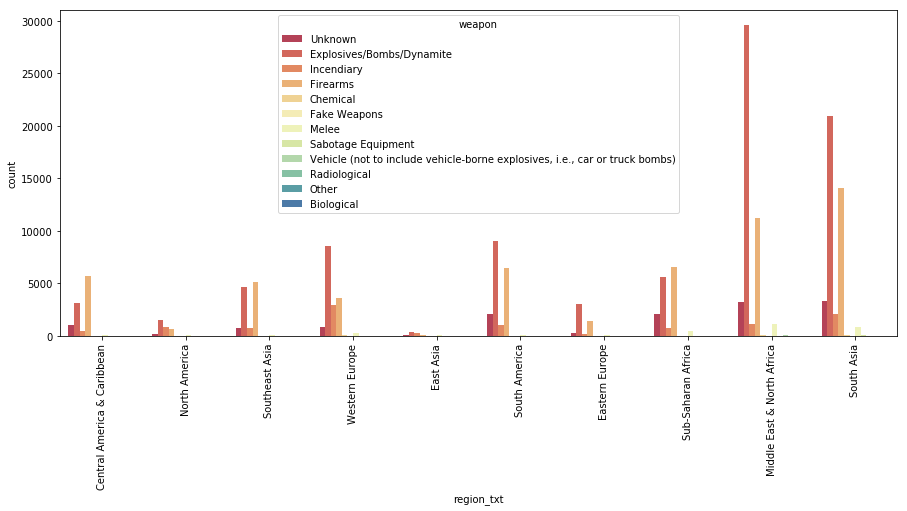

In [313]:
plt.subplots(figsize=(15,6))
sns.countplot(x='region_txt', hue='weapon',data=data[data['region_txt'].isin(data['region_txt'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 12))
plt.xticks(rotation=90)
plt.show()

Attacks increase drastically around 2008. The majority of attacks in the recent years have taken place in Middle East & North Africa and South Asia.

Do different groups tend to use different weapons?

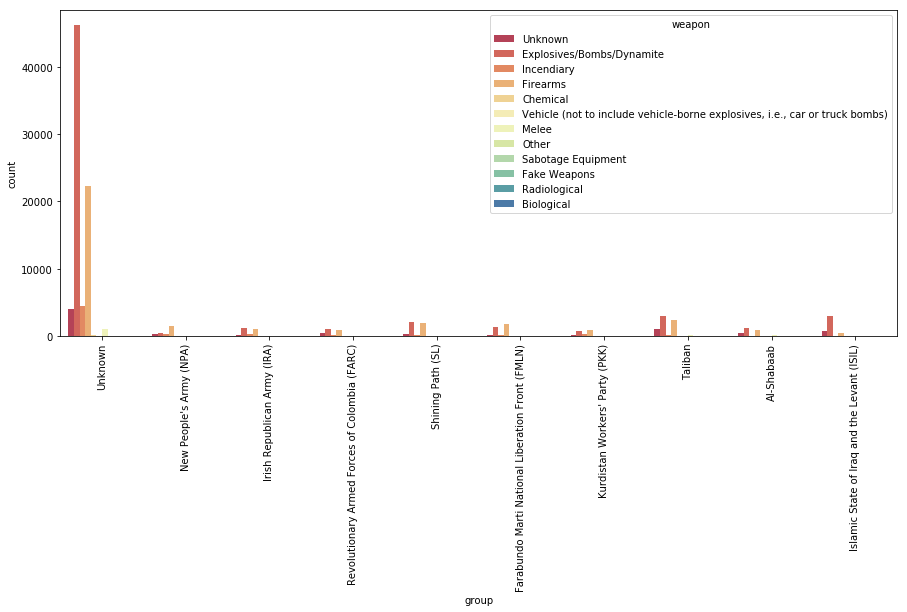

In [319]:
plt.subplots(figsize=(15,6))
sns.countplot(x='group', hue='weapon',data=data[data['group'].isin(data['group'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

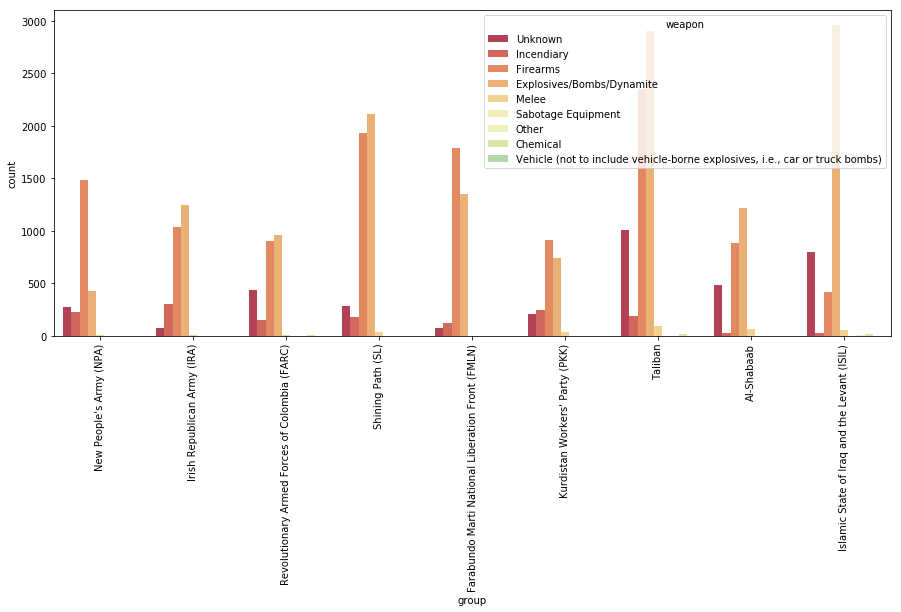

In [321]:
plt.subplots(figsize=(15,6))
data_drop_unknown_group=data[data['group']!='Unknown']
sns.countplot(x='group', hue='weapon',data=data_drop_unknown_group[data_drop_unknown_group['group'].isin(data['group'].value_counts()[:10].index)], palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

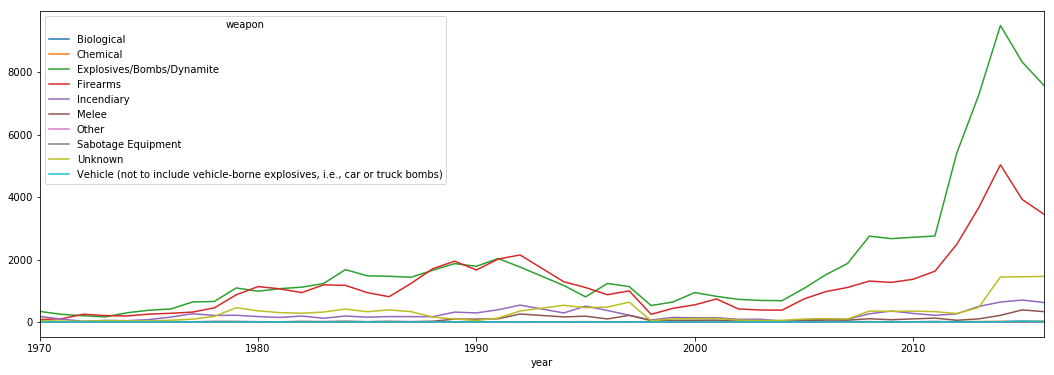

In [330]:
weapon_over_yr=pd.crosstab(data[data['weapon'].isin(data['weapon'].value_counts()[:10].index)].year,data[data['weapon'].isin(data['weapon'].value_counts()[:10].index)].weapon)

weapon_over_yr.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The number of terrorist attacks involving explosives/bombs/dynamite and firearms increased drastically around 2010. 

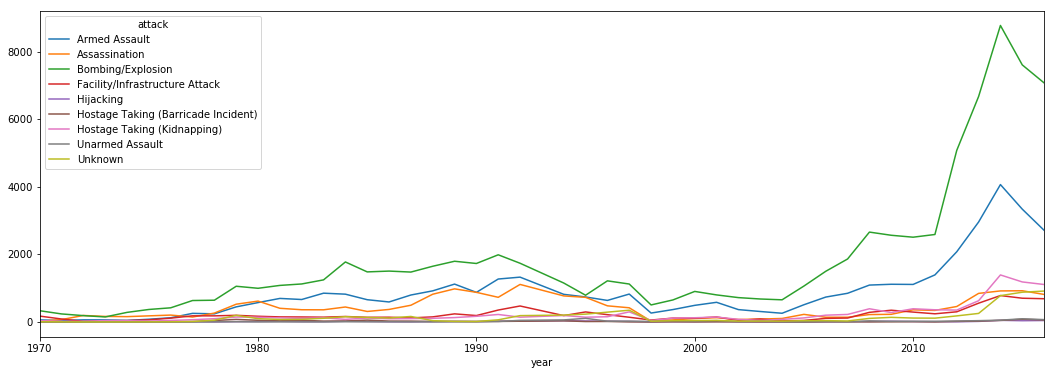

In [86]:
year_attack=pd.crosstab(data.year,data.attack)

year_attack.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The most common attacks in recent years are bombing/explosions and armed assaults. Kidnapping is also at a higher level than historic levels.

In [331]:
# plt.subplots(figsize=(15,6))
# sns.pointplot(x='year',y='victims',data=data)
# plt.xticks(rotation=90)
# plt.show()
#shows mean number of victims in each attack and the confidence interval

In [126]:
countries_top_20_attacks=data['country_name'].value_counts()[:20].index
most_attacks_data_20=data[data['country_name'].isin(countries_top_20_attacks)]
countries_top_20_attacks

countries_top_10_attacks=data['country_name'].value_counts()[:10].index
most_attacks_data_10=data[data['country_name'].isin(countries_top_10_attacks)]
countries_top_10_attacks

Index([u'Iraq', u'Pakistan', u'Afghanistan', u'India', u'Colombia',
       u'Philippines', u'Peru', u'El Salvador', u'United Kingdom', u'Turkey'],
      dtype='object')

Do the distributions of number of victims per attack vary by country?

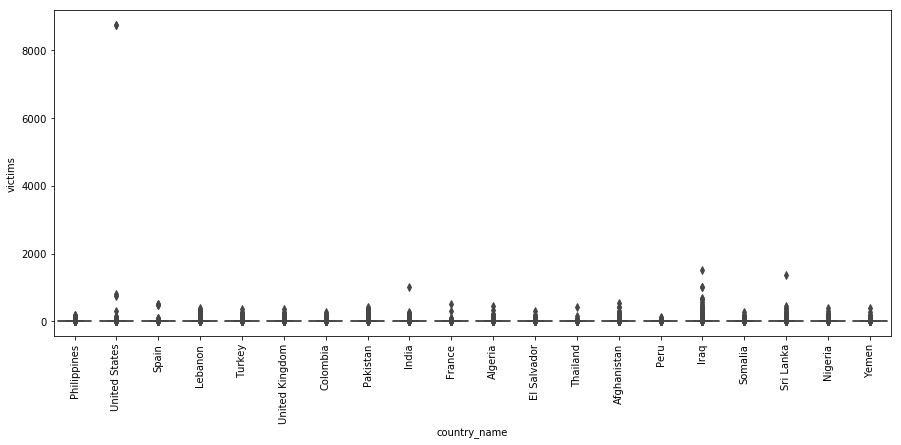

In [111]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='country_name',y='victims',data=most_attacks_data_20)
plt.xticks(rotation=90)
plt.show()

In the above visual, you can see the extreme outlier that occurred in the United States. This represents 9/11, where almost 3000 people were killed and approximately 6000 people were injured.

How have the number of attacks varied over the years across different countries?

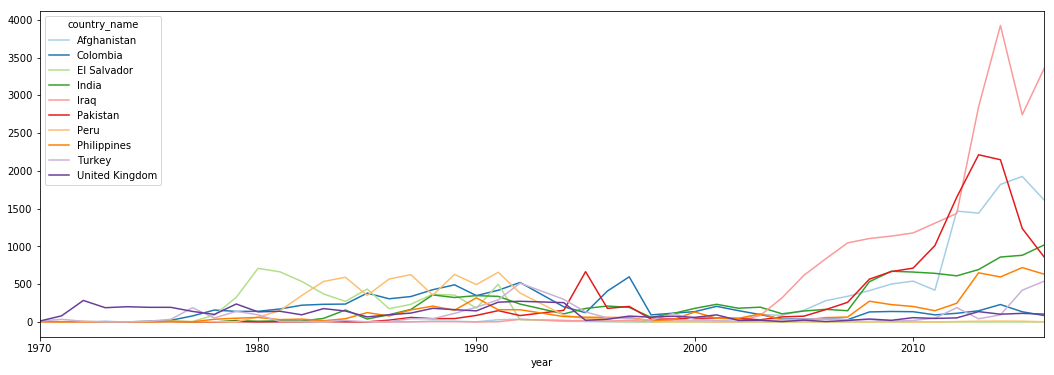

In [127]:
year_attack=pd.crosstab(most_attacks_data_10.year,most_attacks_data_10.country_name)

year_attack.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [139]:
top_10_terror_groups=data['group'].value_counts().index[:10]
top_10_terror_groups_data=data[data['group'].isin(top_10_terror_groups)]

Have different groups been more active over certain time periods?

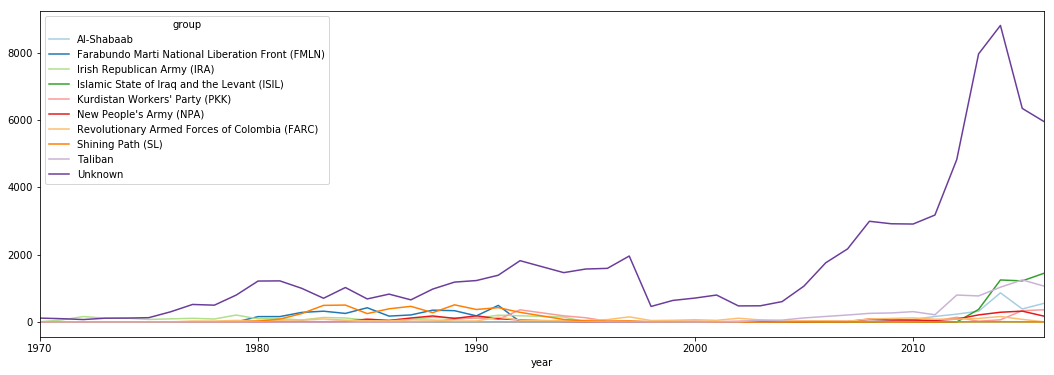

In [140]:
year_attack=pd.crosstab(top_10_terror_groups_data.year,top_10_terror_groups_data.group)

year_attack.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The number of attacks by unknown terrorist groups have increased drastically in recent years. ISIL's activity is on the rise, and the Taliban appears to be the second most active group.

In [172]:
#heat map of attacks using lat/lon. global and usa and iraq
from mpl_toolkits.basemap import Basemap, cm
import numpy as np

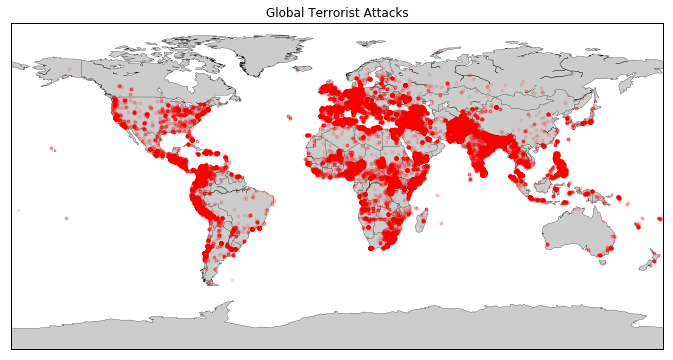

In [352]:
plt.subplots(figsize=(15,6))

map = Basemap(lat_0=True,lat_1=True)
# draw coastlines, country boundaries, fill continents.
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)

lons=data.longitude
lats=data.latitude
x,y=map(lons,lats)
map.plot(x, y, 'go', markersize=3, alpha=0.1, color='r')

plt.title('Global Terrorist Attacks')
plt.show()

**Analysis on USA Terrorist Attacks Since 2000**

In [333]:
usa_data=data[data['country_name']=='United States']
usa_data=usa_data[usa_data['year'].isin(range(2000,2017))]

Number of Attacks over the Years in the USA

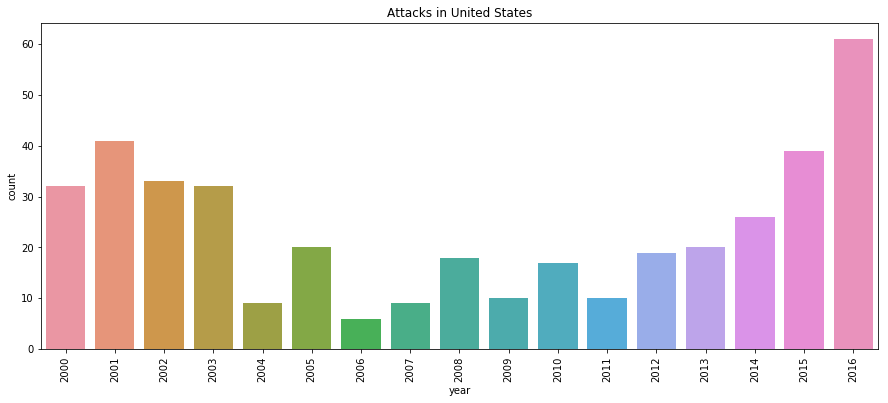

In [334]:
plt.subplots(figsize=(15,6))
sns.countplot(x='year',data=usa_data)
plt.xticks(rotation=90)
plt.title("Attacks in United States")
plt.show()

Number of Victims (Wounded and Killed) in Attacks in the USA

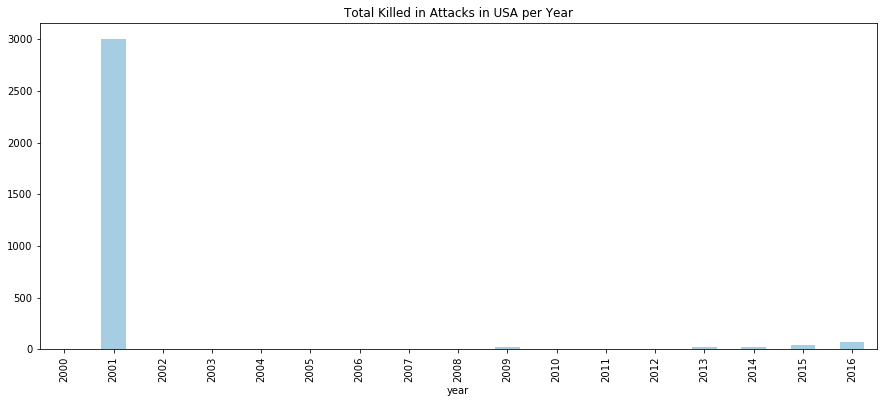

In [337]:
plt.subplots(figsize=(15,6))
usa_data.groupby('year')['nkill'].sum().plot(kind='bar', color=sns.color_palette('Paired',10))
plt.title("Total Killed in Attacks in USA per Year")
plt.show()

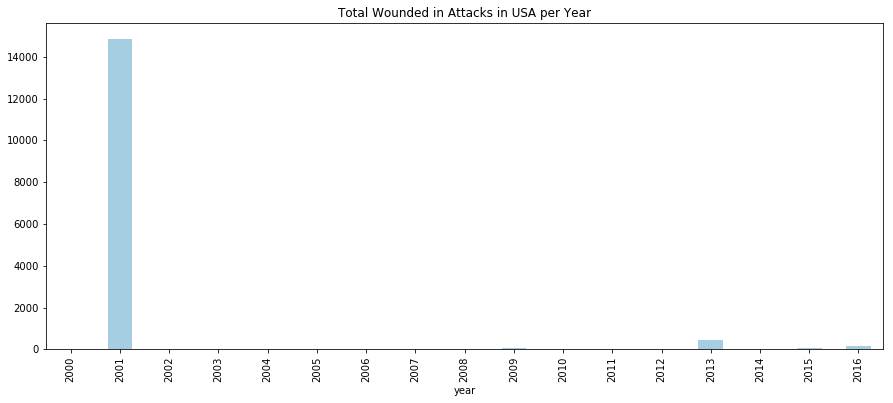

In [338]:
plt.subplots(figsize=(15,6))
usa_data.groupby('year')['nwound'].sum().plot(kind='bar', color=sns.color_palette('Paired',10))
plt.title("Total Wounded in Attacks in USA per Year")
plt.show()

Again, the outlier in 2001 dwarfs all other attacks. To analyze further, I removed 2001 to get a better estimate of number of victims and deaths in the years since 2000.

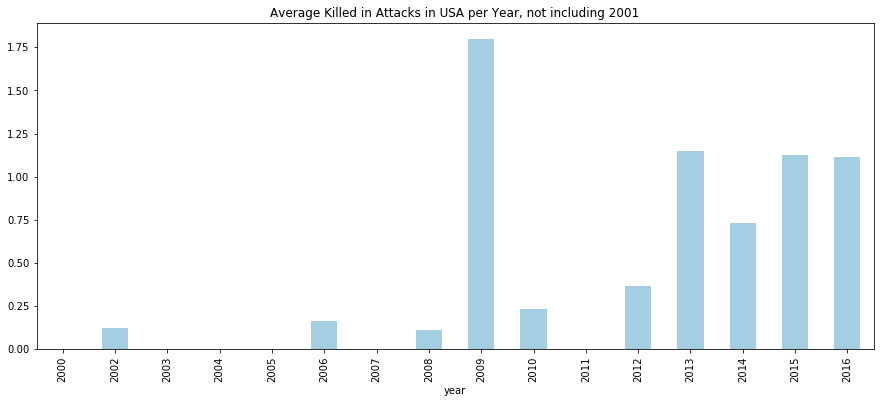

In [339]:
plt.subplots(figsize=(15,6))
usa_data[usa_data['year']!=2001].groupby('year')['nkill'].mean().plot(kind='bar', color=sns.color_palette('Paired',10))
plt.title("Average Killed in Attacks in USA per Year, not including 2001")
plt.show()

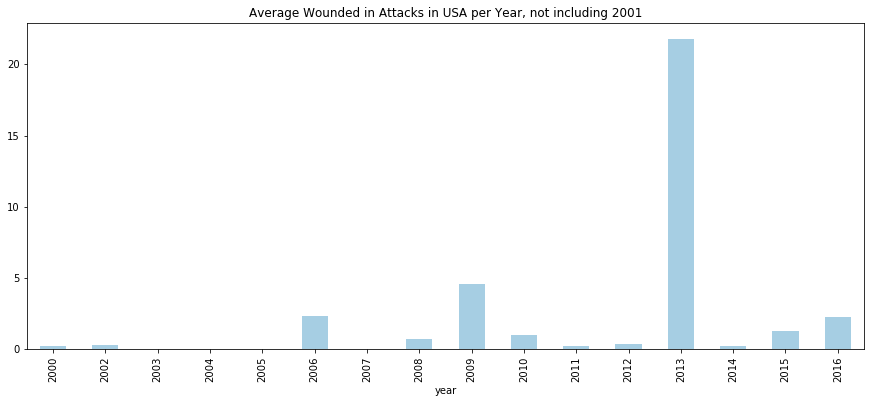

In [340]:
plt.subplots(figsize=(15,6))
usa_data[usa_data['year']!=2001].groupby('year')['nwound'].mean().plot(kind='bar', color=sns.color_palette('Paired',10))
plt.title("Average Wounded in Attacks in USA per Year, not including 2001")
plt.show()

Have the most common methods of attack changed in recent years? Most common weapon?

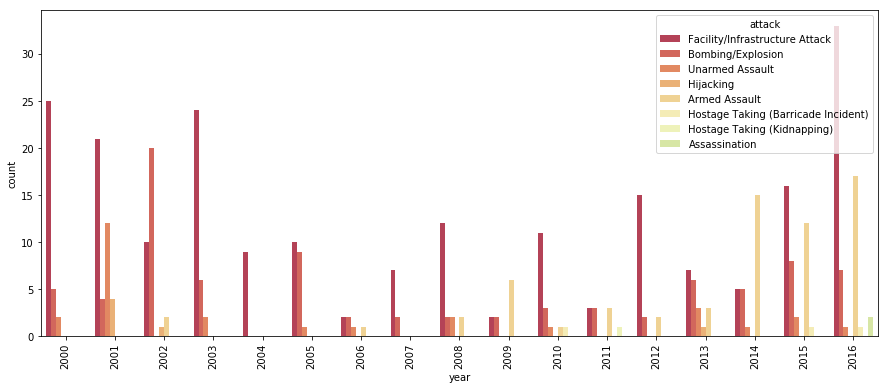

In [335]:
#crime type over the years- number of attacks with each
plt.subplots(figsize=(15,6))

sns.countplot(x='year', hue='attack',data=usa_data, palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

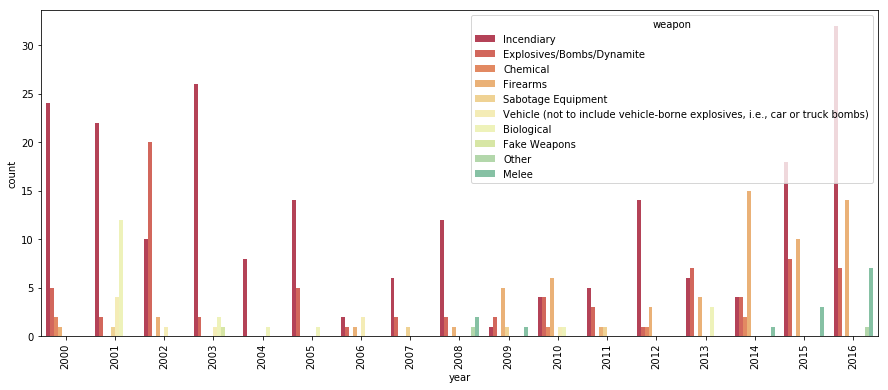

In [336]:
plt.subplots(figsize=(15,6))

sns.countplot(x='year', hue='weapon',data=usa_data, palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

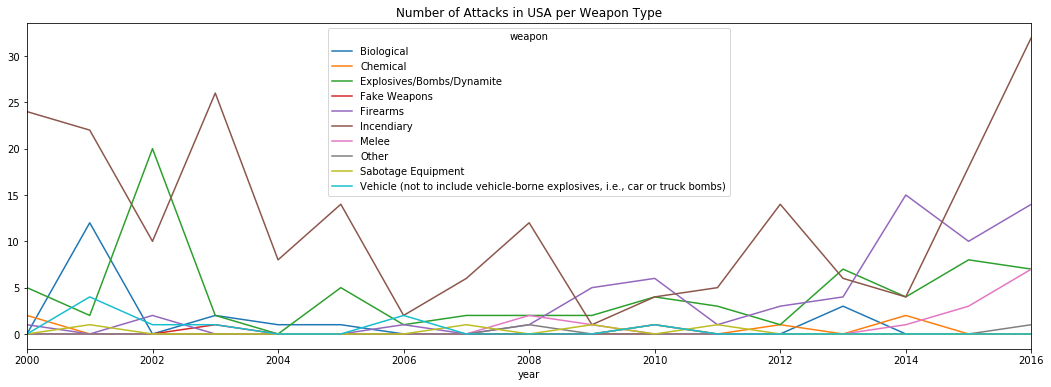

In [274]:
terror_region=pd.crosstab(usa_data.year,usa_data.weapon)
terror_region

terror_region.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Number of Attacks in USA per Weapon Type")
plt.show()

In recent years in the US, we have seen an increase in number of attacks with incendiary, firearms, melee, and explosives.

What are the top terrorist groups in America? Has this changed over the years?

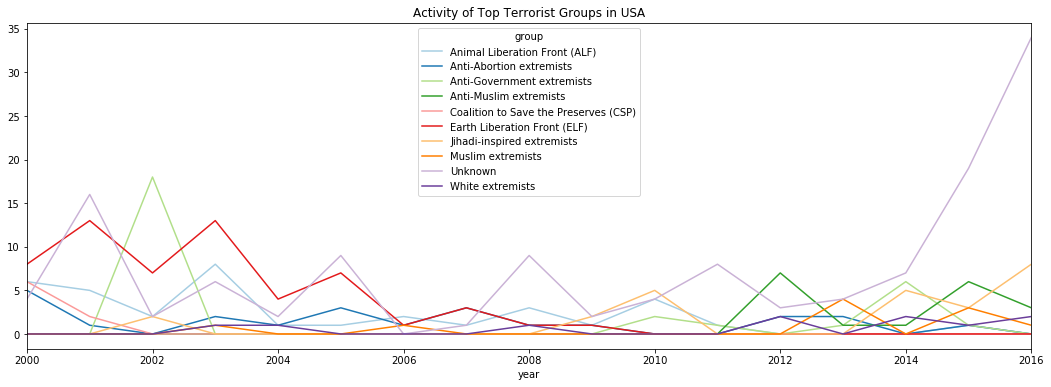

In [275]:
top_groups=usa_data[usa_data['group'].isin(usa_data['group'].value_counts()[:10].index)]
year_attack=pd.crosstab(top_groups.year,top_groups.group)

year_attack.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Activity of Top Terrorist Groups in USA")
plt.show()

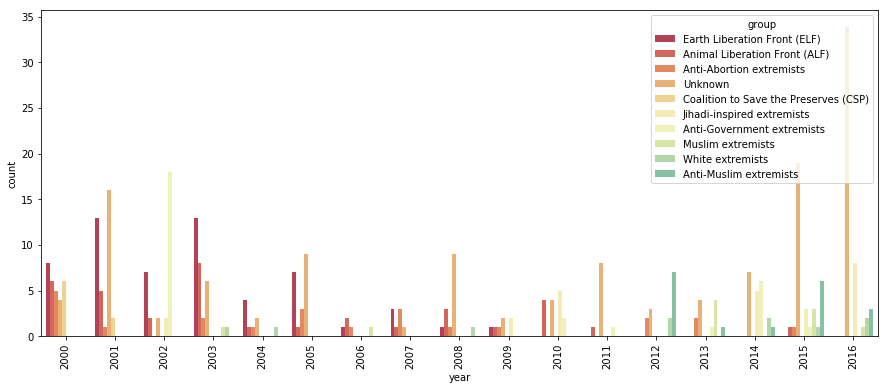

In [341]:
plt.subplots(figsize=(15,6))

sns.countplot(x='year', hue='group',data=top_groups, palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

The attacks by unknown terrorist groups have increased in recent yeras, as have the attacks by Jihadi-inspired extremests. 

In [251]:
#What are the main weapons each group uses?
pd.crosstab(top_groups.group, top_groups.weapon).T.idxmax()

group
Animal Liberation Front (ALF)                                   Incendiary
Anti-Abortion extremists                                        Incendiary
Black Nationalists                               Explosives/Bombs/Dynamite
Fuerzas Armadas de Liberacion Nacional (FALN)    Explosives/Bombs/Dynamite
Jewish Defense League (JDL)                      Explosives/Bombs/Dynamite
Left-Wing Militants                              Explosives/Bombs/Dynamite
New World Liberation Front (NWLF)                Explosives/Bombs/Dynamite
Student Radicals                                                Incendiary
Unknown                                          Explosives/Bombs/Dynamite
White extremists                                                  Firearms
dtype: object

In [269]:
#Who do the main groups target?
pd.crosstab(top_groups.group, top_groups.target).T.idxmax()

group
Animal Liberation Front (ALF)                                       Business
Anti-Abortion extremists                                    Abortion Related
Black Nationalists                                                    Police
Fuerzas Armadas de Liberacion Nacional (FALN)                       Business
Jewish Defense League (JDL)                                         Business
Left-Wing Militants                                                 Military
New World Liberation Front (NWLF)                                   Business
Student Radicals                                     Educational Institution
Unknown                                                             Business
White extremists                                 Private Citizens & Property
dtype: object

Have different groups been targeted in America over time? Below, we see a rise in the targeting of religious figures/institutions, private citizens, and police.

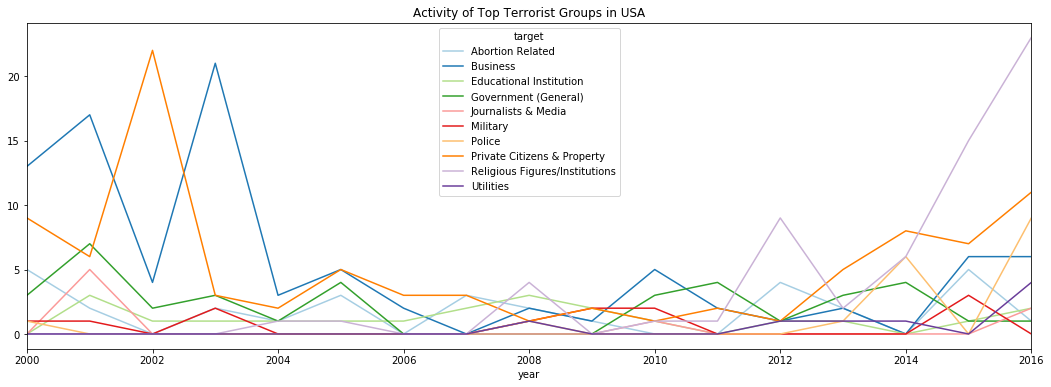

In [276]:
top_targets=usa_data[usa_data['target'].isin(usa_data['target'].value_counts()[:10].index)]
year_attack=pd.crosstab(top_targets.year,top_targets.target)

year_attack.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Activity of Top Terrorist Groups in USA")
plt.show()

Is there seasonality in attacks? Do more attacks occur in certain months? I see no clear pattern in the number of attacks per month over the years.

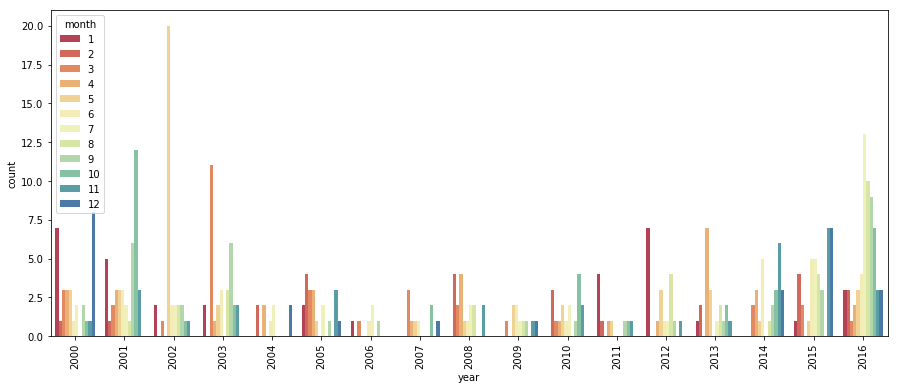

In [342]:
plt.subplots(figsize=(15,6))

sns.countplot(x='year', hue='month',data=usa_data, palette=sns.color_palette("Spectral", 12))

plt.xticks(rotation=90)
plt.show()

In [355]:
usa_data

,year,month,day,country,country_name,region_txt,provstate,city,latitude,longitude,...,group,target,claimmode_txt,propextent_txt,weapon,nkill,ransom,ransompaid,nwound,victims
69789,2000,1,1,217,United States,North America,Michigan,Mesick,44.405705,-85.714454,...,Earth Liberation Front (ELF),Business,NaN,Minor (likely < $1 million),Incendiary,0.0,0.0,NaN,0.0,0.0
69801,2000,1,3,217,United States,North America,California,Petaluma,38.232471,-122.644448,...,Animal Liberation Front (ALF),Business,Letter,Minor (likely < $1 million),Incendiary,0.0,NaN,NaN,0.0,0.0
69802,2000,1,3,217,United States,North America,Ohio,Cincinnati,39.103175,-84.511981,...,Anti-Abortion extremists,Abortion Related,NaN,NaN,Explosives/Bombs/Dynamite,0.0,0.0,NaN,0.0,0.0
69803,2000,1,3,217,United States,North America,Ohio,Cincinnati,39.103175,-84.511981,...,Anti-Abortion extremists,Abortion Related,NaN,NaN,Explosives/Bombs/Dynamite,0.0,0.0,NaN,0.0,0.0
69870,2000,1,15,217,United States,North America,California,Petaluma,38.232471,-122.644448,...,Animal Liberation Front (ALF),Business,Letter,Minor (likely < $1 million),Incendiary,0.0,0.0,NaN,0.0,0.0
69889,2000,1,20,217,United States,North America,Indiana,Bloomington,39.166590,-86.534244,...,Earth Liberation Front (ELF),Private Citizens & Property,Note left at scene,Minor (likely < $1 million),Incendiary,0.0,NaN,NaN,0.0,0.0
69902,2000,1,24,217,United States,North America,California,Redwood City,37.484175,-122.227102,...,Animal Liberation Front (ALF),Business,Letter,NaN,Incendiary,0.0,0.0,NaN,0.0,0.0
70048,2000,2,25,217,United States,North America,California,Fremont,37.548148,-121.988566,...,Animal Liberation Front (ALF),Business,Letter,Unknown,Incendiary,0.0,0.0,NaN,0.0,0.0
70100,2000,3,12,217,United States,North America,Wisconsin,Viroqua,43.557135,-90.888714,...,Animal Liberation Front (ALF),Business,Unknown,Minor (likely < $1 million),Incendiary,0.0,NaN,NaN,0.0,0.0
70132,2000,3,22,217,United States,North America,Utah,Ogden,41.222365,-111.970459,...,Unknown,Government (General),NaN,NaN,Chemical,0.0,NaN,NaN,3.0,3.0


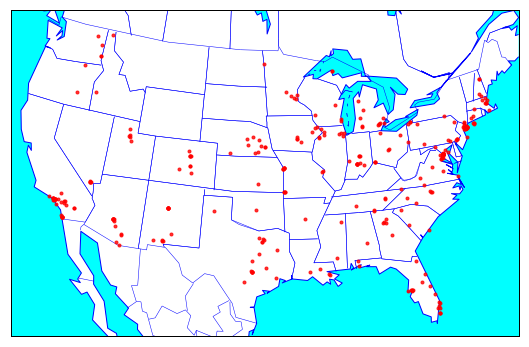

In [371]:
plt.subplots(figsize=(15,6))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# draw coastlines, country boundaries, fill continents.
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines(color='b')
map.drawcountries(color='b')
map.drawstates(color='b')

lons=usa_data.longitude
lats=usa_data.latitude
for i, j in zip(lons, lats):
    if -64>=i>=-119 and 49>=j>=22:
        x,y=map(i,j)
        map.plot(x,y,'go',markersize=3,alpha=0.8,color='r')

#x,y=map(lons,lats)
#map.plot(x, y, 'go', markersize=3, alpha=0.1, color='r')

plt.show()

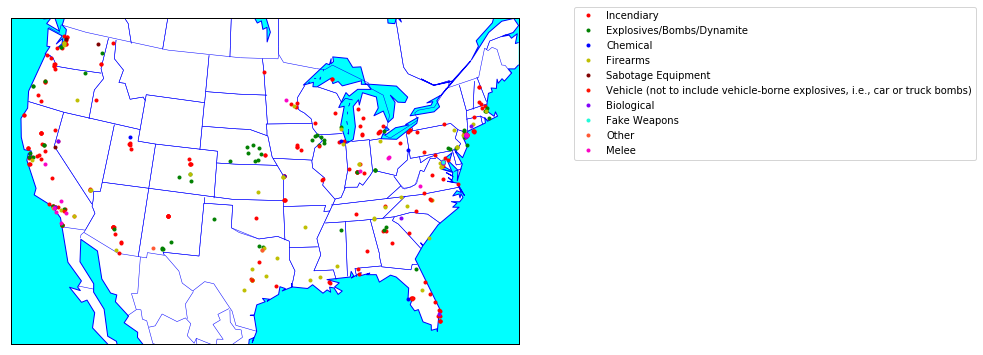

In [370]:
#Are different weapons used in different parts of the USA? Color code these on a map
plt.subplots(figsize=(15,6))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# draw coastlines, country boundaries, fill continents.
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines(color='b')
map.drawcountries(color='b')
map.drawstates(color='b')

colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6']
weapons=list(usa_data['weapon'].unique())
def point_weapon(weapon,color,label):
    lat_group=list(usa_data[usa_data['weapon']==weapon].latitude)
    long_group=list(usa_data[usa_data['weapon']==weapon].longitude)
    x_group,y_group=map(long_group,lat_group)
    map.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(weapons,colors):
    point_weapon(i,j,i)
plt.legend(weapons, bbox_to_anchor=(1.1, 1.05))
plt.show()

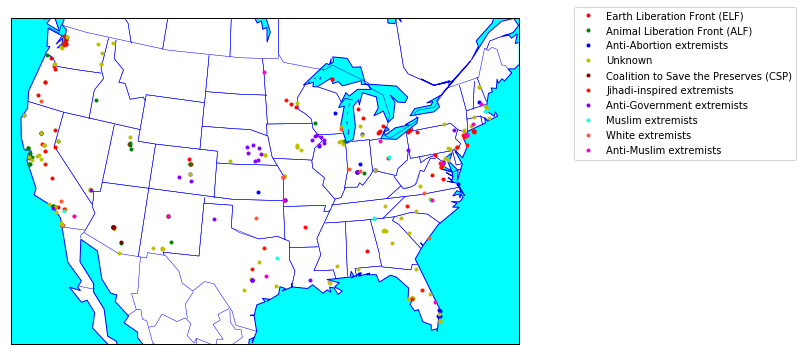

In [375]:
#color code top 10 group attacks in usa
plt.subplots(figsize=(15,6))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# draw coastlines, country boundaries, fill continents.
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines(color='b')
map.drawcountries(color='b')
map.drawstates(color='b')

colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6']
group=list(usa_data[usa_data['group'].isin(usa_data['group'].value_counts()[:10].index)]['group'].unique())
def point_group(group,color,label):
    lat_group=list(usa_data[usa_data['group']==group].latitude)
    long_group=list(usa_data[usa_data['group']==group].longitude)
    x_group,y_group=map(long_group,lat_group)
    map.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    point_group(i,j,i)
plt.legend(group, bbox_to_anchor=(1.1, 1.05))
plt.show()

In [377]:
#find common words in summary? 
usa_data['summary'][:2]

69789    01/1/2000: Four members of the Earth Liberatio...
69801    01/03/2000: Unknown suspects set three separat...
Name: summary, dtype: object

In [379]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import pandas as pd
from wordcloud import WordCloud as wc

In [380]:
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '#'])

In [388]:
list_of_words=[]

def get_words(s):
    list_of_words_line = [i.lower() for i in wordpunct_tokenize(s) if i.lower() not in stop and i.isalpha()]
    list_of_words.append(list_of_words_line)

usa_data['summary'].map(get_words)

flat_list = [item for sublist in list_of_words for item in sublist]

In [397]:
list_of_words=flat_list

str1 = ' '.join(list_of_words)

In [391]:
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(30)
print(mostcommon)

[('states', 341), ('united', 324), ('responsibility', 255), ('claimed', 254), ('incident', 246), ('attack', 237), ('fire', 195), ('group', 184), ('casualties', 183), ('two', 160), ('one', 139), ('assailant', 126), ('set', 117), ('arson', 110), ('new', 106), ('reported', 103), ('elf', 103), ('liberation', 102), ('assailants', 100), ('front', 96), ('arrested', 94), ('attacks', 94), ('damage', 93), ('bombs', 88), ('u', 81), ('building', 79), ('found', 79), ('authorities', 76), ('police', 72), ('device', 71)]


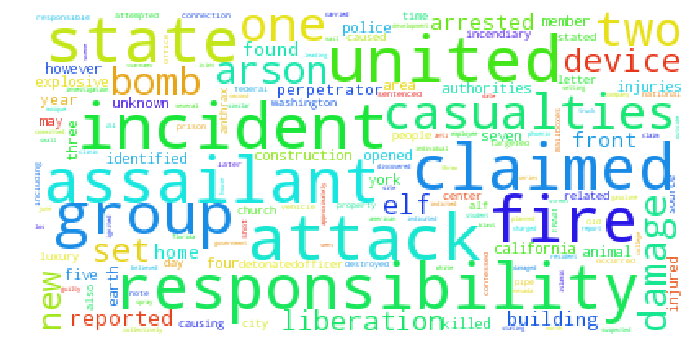

In [400]:
plt.subplots(figsize=(15,6))
wordcloud = wc(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str1)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()